# Trabajo Semanal N°3

### Autor: Gonzalo Goumaz

## Requisitos de diseño
Se pide diseñar un filtro que cumpla con los siguientes requisitos de plantilla.
<img src="Plantilla.png">


## Obtención de función de transferencia de tensión
En este apartado se trabaja para obtener la transferencia para máxima planicidad, que cumpla con los requisitos de plantilla, utilizando el concepto de partes de función (punto 1). Luego, se realiza el diagrama de polos y ceros y el diagrama de respuesta en frecuencia para la transferencia obtenida (punto 2).


In [1]:
from IPython.display import IFrame
IFrame("./TS3.pdf", width = 900, height = 900)

A continuación se realiza una simulación de la transferencia obtenida.

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

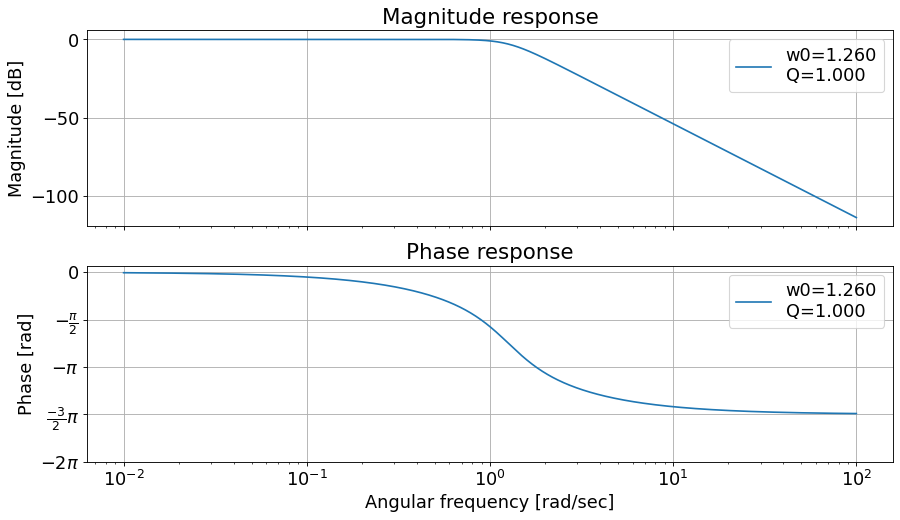

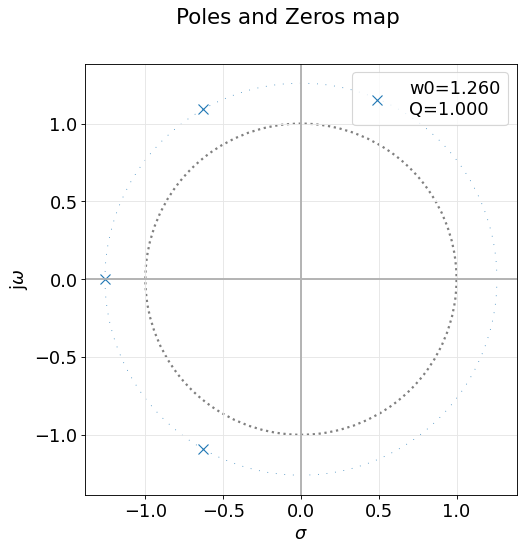

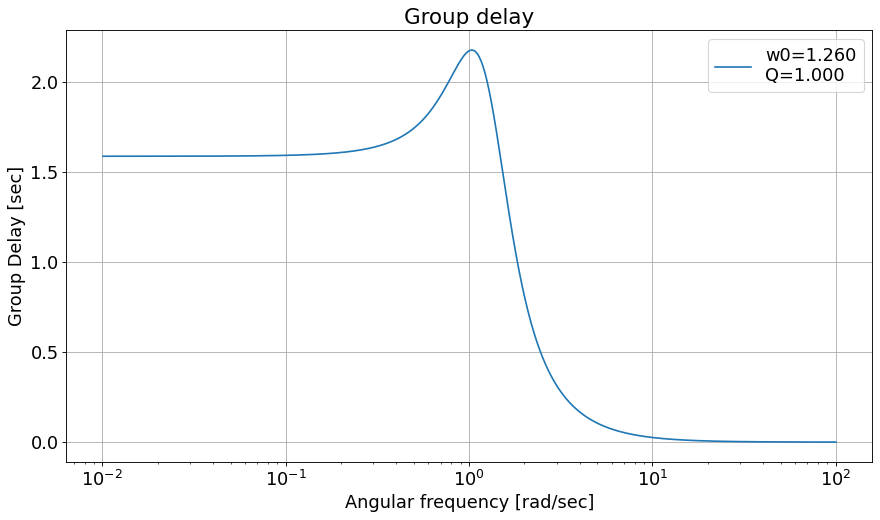

In [2]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import pzmap, bodePlot, GroupDelay
import math as m

# Para fijar el estilo de gráficos en el notebook

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80
fig_font_size = 16

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})

#Defino Parametros
n = 3
epsilon = 1/2
w0 = 1/epsilon**(1/n)
Q  = 1

# Armo la función transferencia del filtro
my_tf = TransferFunction([w0**3],[1, 2*w0, 2*(w0**2), w0**3])
    
# Grafico los diagramas de Bode y de Group Delay

plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f}\nQ={:3.3f}'.format(w0, Q))
pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f}\nQ={:3.3f}'.format(w0, Q))
GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f}\nQ={:3.3f}'.format(w0, Q))


## Implementación del filtro mediante estructuras pasivas
En el siguiente pdf puede verse una implmentación del filtro utilizando estructuras pasivas en cascada (punto 3). Primero se trabaja con componentes normalizados, y luego se desnormalizan los valores de modo que el circuito utilice capacitores de $100nF$ (punto 4)

In [3]:
from IPython.display import IFrame
IFrame("./TS3_Pasiva.pdf", width = 900, height = 900)

Para comprobar que la red cumple con lo impuesto por la plantilla, se realiza una simulación circuital mediante LTspice.
<img src="Red_Pasiva.png">
<img src="Sim_Spice_Pasiva.png">

## Implementación del filtro mediante estructuras activas
Se procede ahora, a buscar una implementación posible utilizando estructuras activas. Nuevamente se trabaja con una red normalizada y luego se implementa utilizando capacitores de $100nF$.

In [4]:
from IPython.display import IFrame
IFrame("./TS3_Activa.pdf", width = 900, height = 900)

Para cerrar con esta implementación, se realiza una simulación en LTspice.
<img src="Red_Activa.png">
<img src="Sim_Spice_Activa.png">

## Bonus: Obtención de función de transferencia utilizando $\omega_B$
Se propone otra manera de obtener la función de transferencia de manera que se pueda trabajar el filtro como si fuese de tipo Butterworth.

In [5]:
from IPython.display import IFrame
IFrame("./TS3_Bonus.pdf", width = 900, height = 900)

Para finalizar, se realiza una simulación númerica para verificar la respuestea en frecuencia y el diagrama de polos y ceros de la transferencia obtenida. Luego se realiza una simulación circuital de la implementación propuesta.

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

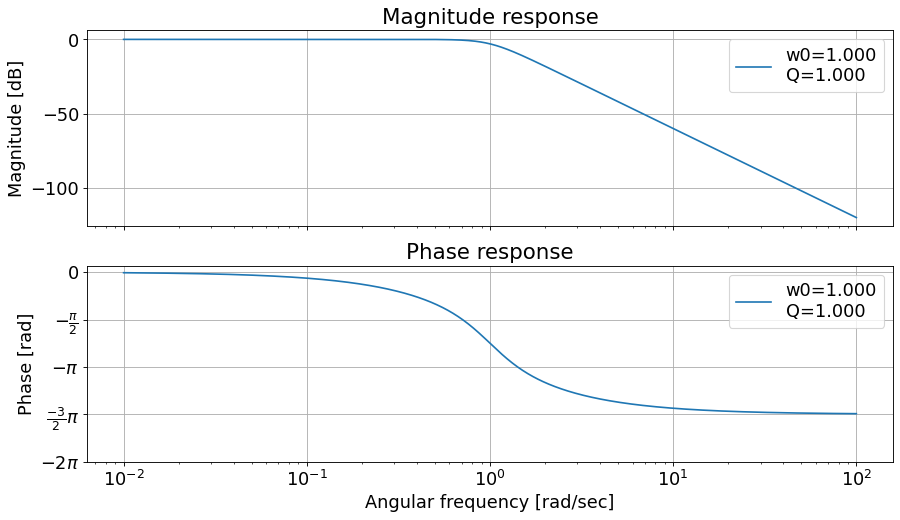

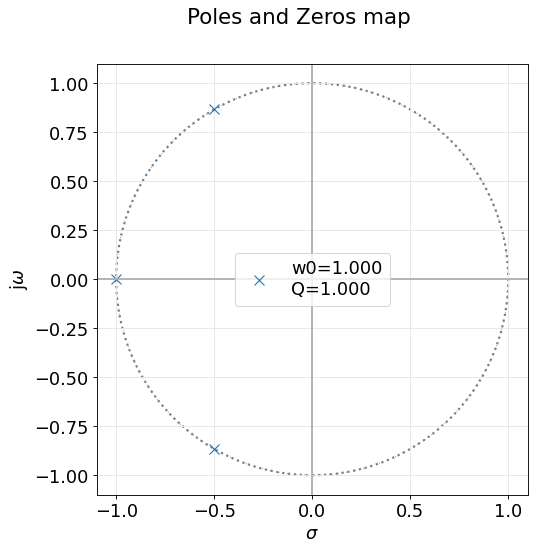

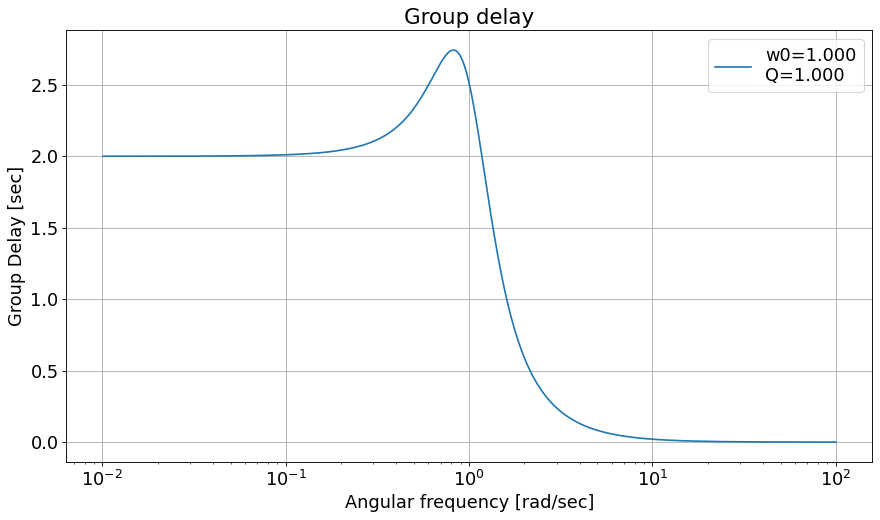

In [7]:
w0 = 1
Q  = 1
# Armo la función transferencia del filtro
my_tf = TransferFunction([1],[1, 2, 2, 1])
    
# Grafico los diagramas de Bode y de Group Delay

plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f}\nQ={:3.3f}'.format(w0, Q))
pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f}\nQ={:3.3f}'.format(w0, Q))
GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f}\nQ={:3.3f}'.format(w0, Q))


<img src="Red_Bonus.png">
<img src="Sim_Spice_Bonus.png">